<a href="https://colab.research.google.com/github/chponya/python_labs/blob/main/%D0%BB%D0%B0%D0%B12_%D0%91%D1%83%D0%BD%D1%8F%D0%BA%D0%BE%D0%B2%D0%B0_%D0%A4%D0%98%D0%98%D0%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Загружаем CSV
url = 'https://raw.githubusercontent.com/chponya/python_labs/main/lab2_interpolation/lab2_data.csv'
df = pd.read_csv(url, sep=';', na_values='NaN')

In [3]:
# Разделим данные
x_all = df['x'].values
y_all = df['y'].values

# Копии для интерполяции
y_linear = y_all.copy()
y_quadratic = y_all.copy()

In [6]:
# ЛИНЕЙНАЯ интерполяция (по 2 ближайшим известным точкам)
def linear_interpolate(x_known, y_known, x_target):
    for xi in x_target:
        left_idx = np.where((x_known < xi) & ~np.isnan(y_known))[0][-1]
        right_idx = np.where((x_known > xi) & ~np.isnan(y_known))[0][0]
        x1, y1 = x_known[left_idx], y_known[left_idx]
        x2, y2 = x_known[right_idx], y_known[right_idx]
        a = (y2 - y1) / (x2 - x1)
        b = y1 - a * x1
        yield a * xi + b

# КВАДРАТИЧНАЯ интерполяция (по 3 ближайшим известным точкам)
def quadratic_interpolate(x_known, y_known, x_target):
    for xi in x_target:
        known = [(x, y) for x, y in zip(x_known, y_known) if not np.isnan(y)]
        diffs = sorted(known, key=lambda p: abs(p[0] - xi))[:3]
        X = np.array([[x**2, x, 1] for x, _ in diffs])
        Y = np.array([y for _, y in diffs])
        coeffs = np.linalg.solve(X, Y)
        a, b, c = coeffs
        yield a * xi ** 2 + b * xi + c

# Найдём индексы, где пропуски
nan_indices = np.where(np.isnan(y_all))[0]
x_nans = x_all[nan_indices]

# Интерполяции
for idx, y_val in zip(nan_indices, linear_interpolate(x_all, y_all, x_nans)):
    y_linear[idx] = y_val

for idx, y_val in zip(nan_indices, quadratic_interpolate(x_all, y_all, x_nans)):
    y_quadratic[idx] = y_val



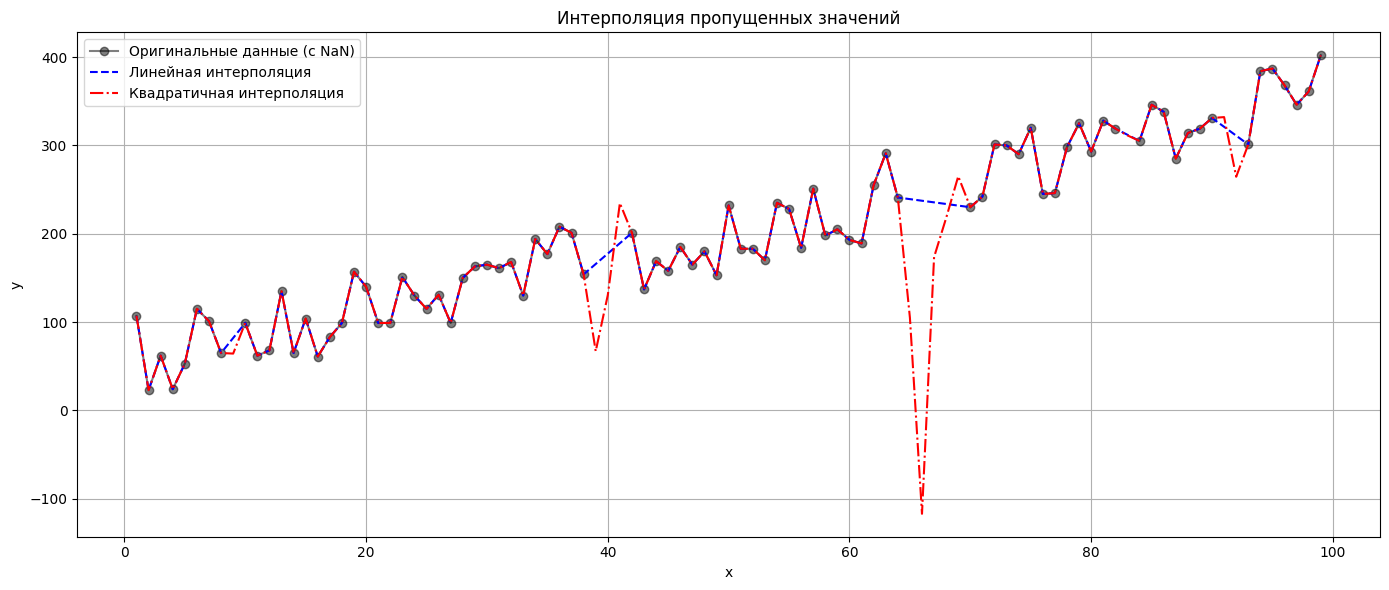

In [7]:
# График
plt.figure(figsize=(14, 6))
plt.plot(x_all, y_all, 'ko-', label='Оригинальные данные (с NaN)', alpha=0.5)
plt.plot(x_all, y_linear, 'b--', label='Линейная интерполяция')
plt.plot(x_all, y_quadratic, 'r-.', label='Квадратичная интерполяция')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция пропущенных значений')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
